In [1]:
import pandas as pd

In [2]:
sub = pd.read_csv('../input/SampleSubmission.csv')
sub.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,Karoo Scrub Robin,White-browed Scrub Robin,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting
0,019OYB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01S9OX,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,02CS12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,02LM3W,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0C3A2V,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train = pd.read_csv('../input/Train.csv')
train.head()

,ID,common_name
0,MBMG2C,Ring-necked Dove
1,K8LJSB,Ring-necked Dove
2,OGD9L6,Ring-necked Dove
3,581PCQ,Ring-necked Dove
4,P91M1F,Ring-necked Dove


In [4]:
# This list will be useful later
birds = sub.columns[1:]
birds

Index(['Ring-necked Dove', 'Black Cuckoo', 'Red-chested Cuckoo',
       'Fiery-necked Nightjar', 'Green Wood Hoopoe', 'Crested Barbet',
       'Cape Batis', 'Olive Bushshrike', 'Orange-breasted Bushshrike',
       'Bokmakierie', 'Black-backed Puffback', 'Southern Boubou',
       'Black-headed Oriole', 'Fork-tailed Drongo',
       'African Paradise Flycatcher', 'Sabota Lark', 'Eastern Clapper Lark',
       'Rufous-naped Lark', 'Dark-capped Bulbul', 'Sombre Greenbul',
       'Long-billed Crombec', 'African Reed Warbler', 'Rattling Cisticola',
       'Levaillants Cisticola', 'Tawny-flanked Prinia', 'Karoo Prinia',
       'Bar-throated Apalis', 'Green-backed Camaroptera',
       'Chestnut-vented Warbler', 'Cape White-eye', 'Karoo Scrub Robin',
       'White-browed Scrub Robin', 'Cape Robin-Chat',
       'White-browed Robin-Chat', 'Chorister Robin-Chat',
       'Southern Double-collared Sunbird', 'White-bellied Sunbird',
       'African Pipit', 'African Rock Pipit', 'Cape Bunting'],
      d

In [5]:
# Add file names

train['file_name'] = 'train/'+train['ID']+'.png'
sub['file_name'] = 'test/'+sub['ID']+'.png'

In [6]:
# Checking that the spectrograms were generated successfully:
import glob
ims = glob.glob('../train/*.png')
print(len(ims), len(train))

1857 1857


In [7]:
# If you stopped the process early and want to try with only a few spectrograms, this will only use the ones that have been generated
train['img_path'] = '../train\\' + train['ID']+'.png'
train = train.loc[train.img_path.isin(ims)]
len(train)

1857

In [8]:
# Similarly, test now has rows for files that have had spectrograms created.
sub['img_path'] = '../test\\'+sub['ID']+'.png'
ims = glob.glob('../test/*.png')
test = sub.loc[sub.img_path.isin(ims)]
print(len(sub), len(test))

911 911


# Modelling

I use a model pre-trained on imagenet, and throw the spectrograms at it. Not the most elegant approach, but it will do for now!

In [12]:
from fastai.vision import *

In [14]:
np.random.seed(42)

# tfms = get_transforms()
tfms=[]
data = (ImageList.from_df(train, path='../', cols=2)
      .split_by_rand_pct(.3, seed=42)
      .label_from_df(cols=1)
      .transform(tfms, size=224)
      .databunch(bs=32)
      .normalize(imagenet_stats)
     )

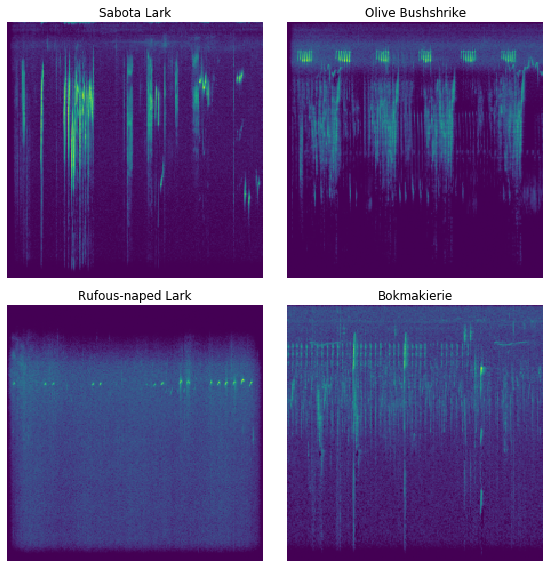

In [15]:
data.show_batch(rows=2)

In [16]:
print(data.classes)

['African Paradise Flycatcher', 'African Pipit', 'African Reed Warbler', 'African Rock Pipit', 'Bar-throated Apalis', 'Black Cuckoo', 'Black-backed Puffback', 'Black-headed Oriole', 'Bokmakierie', 'Cape Batis', 'Cape Bunting', 'Cape Robin-Chat', 'Cape White-eye', 'Chestnut-vented Warbler', 'Chorister Robin-Chat', 'Crested Barbet', 'Dark-capped Bulbul', 'Eastern Clapper Lark', 'Fiery-necked Nightjar', 'Fork-tailed Drongo', 'Green Wood Hoopoe', 'Green-backed Camaroptera', 'Karoo Prinia', 'Karoo Scrub Robin', 'Levaillants Cisticola', 'Long-billed Crombec', 'Olive Bushshrike', 'Orange-breasted Bushshrike', 'Rattling Cisticola', 'Red-chested Cuckoo', 'Ring-necked Dove', 'Rufous-naped Lark', 'Sabota Lark', 'Sombre Greenbul', 'Southern Boubou', 'Southern Double-collared Sunbird', 'Tawny-flanked Prinia', 'White-bellied Sunbird', 'White-browed Robin-Chat', 'White-browed Scrub Robin']


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-02
Min loss divided by 10: 3.98E-03


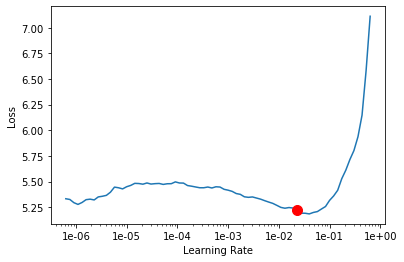

In [17]:
# Create a learner and pick a learning rate
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy, top_k_accuracy]).to_fp16().mixup()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [18]:
# Train the head of the model
lr = 4e-3
learn.fit_one_cycle(3, lr)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,5.005246,4.092174,0.867145,0.132855,0.319569,00:55
1,4.242442,3.314068,0.782765,0.217235,0.482944,00:56
2,3.549111,3.107744,0.768402,0.231598,0.499102,00:55


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 1.32E-07


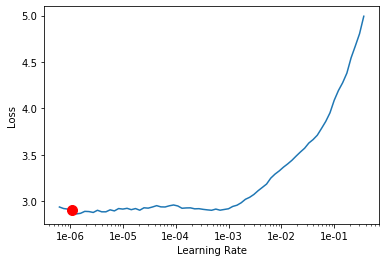

In [19]:
# Not doing very well yet. Let's train the inner layers
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [20]:
learn.fit_one_cycle(20, slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,2.899934,2.987361,0.737881,0.262118,0.531418,00:55
1,2.695007,2.791961,0.700180,0.299820,0.578097,00:55
2,2.516296,2.722359,0.692998,0.307002,0.612208,00:55
3,2.479668,2.619278,0.653501,0.346499,0.673250,00:55
4,2.434079,2.456012,0.628366,0.371634,0.710952,00:55
5,2.257843,2.331799,0.576302,0.423698,0.732495,00:55
6,2.080067,2.336617,0.587074,0.412926,0.741472,00:55
7,1.898562,2.138667,0.524237,0.475763,0.789946,00:55
8,1.752181,2.258448,0.551167,0.448833,0.754040,00:55
9,1.591375,1.856616,0.481149,0.518851,0.838420,00:55


In [21]:
learn.save('resnet34-mixup-stg1')

In [23]:
data = (ImageList.from_df(train, path='../', cols=2)
      .split_by_rand_pct(.3, seed=42)
      .label_from_df(cols=1)
      .transform(tfms, size=512)
      .databunch(bs=32)
      .normalize(imagenet_stats)
     )

In [24]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy, top_k_accuracy]).to_fp16().mixup()

In [25]:
learn.load('resnet34-mixup-stg1')

Learner(data=ImageDataBunch;

Train: LabelList (1300 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
Ring-necked Dove,Ring-necked Dove,Ring-necked Dove,Ring-necked Dove,Ring-necked Dove
Path: .;

Valid: LabelList (557 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
Cape Batis,Black-backed Puffback,Bar-throated Apalis,Chestnut-vented Warbler,Black-backed Puffback
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pa

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-06
Min loss divided by 10: 2.29E-03


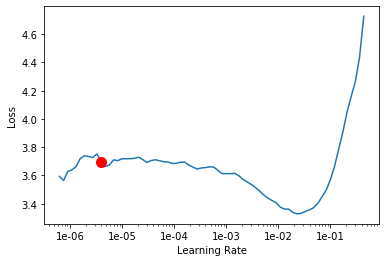

In [26]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [27]:
lr = 3e-3
learn.fit_one_cycle(4, lr)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,3.131471,2.575351,0.614004,0.385996,0.700180,01:00
1,2.520937,2.150166,0.535009,0.464991,0.782765,00:59
2,2.091512,1.794006,0.470377,0.529623,0.811490,00:59
3,1.831140,1.731999,0.450628,0.549372,0.818671,00:59


In [29]:
learn.save('resnet34-mixup-stg2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.32E-07


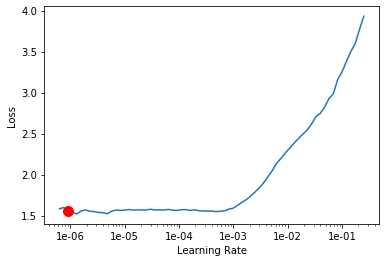

In [28]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [30]:
learn.fit_one_cycle(20, slice(5e-5, 5e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,1.557819,1.694890,0.420108,0.579892,0.831239,01:03
1,1.487867,1.613971,0.409336,0.590664,0.836625,01:03
2,1.439129,1.687480,0.416517,0.583483,0.838420,01:03
3,1.407654,1.710611,0.447038,0.552962,0.831239,01:03
4,1.356161,1.673031,0.394973,0.605027,0.829443,01:03
5,1.365334,1.803093,0.443447,0.556553,0.809695,01:03
6,1.281520,1.577213,0.398564,0.601436,0.852783,01:03
7,1.239868,1.537608,0.380610,0.619390,0.836625,01:03
8,1.209068,1.499983,0.371634,0.628366,0.856373,01:03
9,1.170747,1.478594,0.362657,0.637343,0.854578,01:03


In [31]:
learn.save('resnet34-mixup-stg2b')

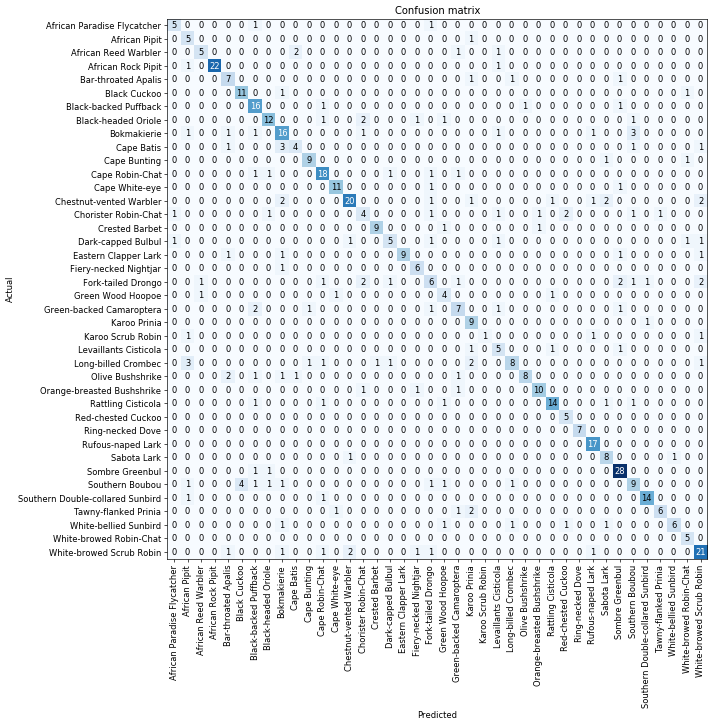

In [32]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Making a submission

Save the model's predicted probabilities to a file following the sample submission format. This can be submitted on Zindi.

In [33]:
src = (ImageList.from_folder('../test'))

In [34]:
# Add the test data as a test set for the model
learn.data.add_test(src)

In [35]:
# Get predictions
preds, y = learn.get_preds(DatasetType.Test)

In [36]:
test.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting,file_name,img_path
0,019OYB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test/019OYB.png,test\019OYB.png
1,01S9OX,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test/01S9OX.png,test\01S9OX.png
2,02CS12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test/02CS12.png,test\02CS12.png
3,02LM3W,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test/02LM3W.png,test\02LM3W.png
4,0C3A2V,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test/0C3A2V.png,test\0C3A2V.png


In [37]:
# Add preds to test
test = test.copy()
for b in birds:
  test[b] = preds[:,learn.data.classes.index(b)]
test.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting,file_name,img_path
0,019OYB,0.000172,0.000087,0.003406,0.982028,0.000041,0.001670,0.000189,0.000170,0.000389,...,0.000062,0.003119,0.000291,0.000251,0.000006,0.000031,0.000910,0.000098,test/019OYB.png,test\019OYB.png
1,01S9OX,0.000680,0.000363,0.001499,0.000332,0.000312,0.000417,0.001163,0.000433,0.000240,...,0.022348,0.000281,0.019876,0.000073,0.000085,0.000351,0.000467,0.000239,test/01S9OX.png,test\01S9OX.png
2,02CS12,0.006613,0.002611,0.000155,0.000817,0.001973,0.000392,0.009545,0.008114,0.004380,...,0.008124,0.003409,0.000959,0.007547,0.000838,0.008317,0.003727,0.011890,test/02CS12.png,test\02CS12.png
3,02LM3W,0.042327,0.001396,0.006005,0.001433,0.084506,0.019955,0.268559,0.171040,0.002759,...,0.001723,0.001289,0.005235,0.003916,0.001683,0.003294,0.002346,0.001447,test/02LM3W.png,test\02LM3W.png
4,0C3A2V,0.000613,0.004822,0.002141,0.001503,0.012956,0.003643,0.033836,0.001561,0.001166,...,0.098868,0.022277,0.047253,0.056554,0.018888,0.002305,0.002729,0.003552,test/0C3A2V.png,test\0C3A2V.png


In [38]:
# Merge back into submission DF, adding a low prob prediction for rows where we had no image generated
cols = ['ID']
for b in birds:
  cols.append(b)
ss = pd.merge(sub['ID'], test[cols], on='ID', how='left' )
ss = ss.fillna(1/40) # For those with NaNs (if you only generated spectrograms for a subset of the test mp3s)
ss.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,Karoo Scrub Robin,White-browed Scrub Robin,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting
0,019OYB,0.000172,0.000087,0.003406,0.982028,0.000041,0.001670,0.000189,0.000170,0.000389,...,0.000024,0.000056,0.000062,0.003119,0.000291,0.000251,0.000006,0.000031,0.000910,0.000098
1,01S9OX,0.000680,0.000363,0.001499,0.000332,0.000312,0.000417,0.001163,0.000433,0.000240,...,0.000320,0.002064,0.022348,0.000281,0.019876,0.000073,0.000085,0.000351,0.000467,0.000239
2,02CS12,0.006613,0.002611,0.000155,0.000817,0.001973,0.000392,0.009545,0.008114,0.004380,...,0.003140,0.000592,0.008124,0.003409,0.000959,0.007547,0.000838,0.008317,0.003727,0.011890
3,02LM3W,0.042327,0.001396,0.006005,0.001433,0.084506,0.019955,0.268559,0.171040,0.002759,...,0.019265,0.011811,0.001723,0.001289,0.005235,0.003916,0.001683,0.003294,0.002346,0.001447
4,0C3A2V,0.000613,0.004822,0.002141,0.001503,0.012956,0.003643,0.033836,0.001561,0.001166,...,0.000590,0.007039,0.098868,0.022277,0.047253,0.056554,0.018888,0.002305,0.002729,0.003552


In [39]:
# Check shape
ss.shape

(911, 41)

In [40]:
# Save 
ss.to_csv('./submissions/submission_starter_notebook_resnet34_mixup_119_894_20ep.csv', index=False)